In [40]:
import faker
import random
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [41]:
f=faker.Faker('es_ES')

In [42]:
lista=[]
info_countries = [
    {
        'country': 'China',
        'currency': 'CNY'
    }, {
        'country': 'Germany',
        'currency': 'EUR'
    }, {
        'country': 'Russia',
        'currency': 'RUB'
    }
]
for n in range(1000):
    email=f.email()
    info_country = random.choice(info_countries)
    lista.append(
        {
            'name': f.name(),
            'email': email,
            'phone': f.phone_number(),
            'orders': abs(random.gauss(10,5))+1,
            'devos': abs(random.gauss(10+10*int('hotmail' in email),5)),
            'is_logged': True,
            'country': info_country['country'],
            'currency': info_country['currency']
        }
    )
for n in range(1000):
    email=f.email()
    info_country = random.choice(info_countries)
    lista.append(
        {
            'name': f.name(),
            'email': email,
            'phone': f.phone_number(),
            'orders': abs(random.gauss(10,5))+1,
            'devos': abs(random.gauss(15+10*int('hotmail' in email),5)),
            'is_logged': False,
            'country': info_country['country'],
            'currency': info_country['currency']
        }
    )
random.shuffle(lista)
# Añadamos unos cuantos usuarios con el email repetido
for i in range(100):
    user=lista[i*20]
    lista.append(
        {
            'name': f.name(),
            'email': user['email'],
            'phone': f.phone_number(),
            'orders': abs(random.gauss(10,10))+1,
            'devos': abs(random.gauss(15+9*int('hotmail' in user['email']),5)),
            'is_logged': random.random()>0.5,
            'country': user['country'],
            'currency': user['currency']
        }
    )
random.shuffle(lista)
for i in range(10):
    user=lista[i*20]
    lista.append(
        {
            'name': f.name(),
            'email': user['email'],
            'phone': f.phone_number(),
            'orders': abs(random.gauss(10,10))+1,
            'devos': abs(random.gauss(15+10*int('hotmail' in user['email']),5)),
            'is_logged': random.random()>0.5,
            'country': user['country'],
            'currency': user['currency']
        }
    )
random.shuffle(lista)

In [43]:
lista[:3]

[{'name': 'Rafael Ávila Valera',
  'email': 'nfiol@gmail.com',
  'phone': '+34 378 854 037',
  'orders': 13.399818690782578,
  'devos': 15.863820571890168,
  'is_logged': False,
  'country': 'China',
  'currency': 'CNY'},
 {'name': 'Cristian Requena-Cal',
  'email': 'fbenavides@heras.com',
  'phone': '+34 252 852 542',
  'orders': 6.315560049588394,
  'devos': 12.541837286938362,
  'is_logged': True,
  'country': 'Russia',
  'currency': 'RUB'},
 {'name': 'Begoña Garcés Lucas',
  'email': 'soledadperez@capdevila-becerra.com',
  'phone': '+34787 521 223',
  'orders': 18.885509269879186,
  'devos': 20.804533736807322,
  'is_logged': False,
  'country': 'Russia',
  'currency': 'RUB'}]

In [44]:
import pandas

Pandas es para manejar dataframes
https://pandas.pydata.org/

In [45]:
df = pandas.DataFrame.from_dict(lista)

In [46]:
df.head()

,name,email,phone,orders,devos,is_logged,country,currency
0,Rafael Ávila Valera,nfiol@gmail.com,+34 378 854 037,13.399819,15.863821,False,China,CNY
1,Cristian Requena-Cal,fbenavides@heras.com,+34 252 852 542,6.315560,12.541837,True,Russia,RUB
2,Begoña Garcés Lucas,soledadperez@capdevila-becerra.com,+34787 521 223,18.885509,20.804534,False,Russia,RUB
3,Luz de Cid,celia29@fortuny.com,+34906 399 408,6.540777,8.027166,True,Germany,EUR
4,Encarnacion Francisca Navarrete Valverde,ricardo71@yahoo.com,+34 076014719,17.629685,8.773067,True,Russia,RUB


In [47]:
df['prob']=df['devos']/df['orders']

In [48]:
df.head()

,name,email,phone,orders,devos,is_logged,country,currency,prob
0,Rafael Ávila Valera,nfiol@gmail.com,+34 378 854 037,13.399819,15.863821,False,China,CNY,1.183883
1,Cristian Requena-Cal,fbenavides@heras.com,+34 252 852 542,6.315560,12.541837,True,Russia,RUB,1.985863
2,Begoña Garcés Lucas,soledadperez@capdevila-becerra.com,+34787 521 223,18.885509,20.804534,False,Russia,RUB,1.101614
3,Luz de Cid,celia29@fortuny.com,+34906 399 408,6.540777,8.027166,True,Germany,EUR,1.227250
4,Encarnacion Francisca Navarrete Valverde,ricardo71@yahoo.com,+34 076014719,17.629685,8.773067,True,Russia,RUB,0.497630


In [49]:
df['mail_host']=list(map(lambda x: x.split('@')[1], df['email']))

In [50]:
df['mail_host_hist'] = [x if x in list(df['mail_host'].value_counts()[:3].index) else 'other' for x in df['mail_host']]

In [51]:
import bokeh
from bokeh.io import curdoc, show
from bokeh.layouts import column, layout
from bokeh.models import ColumnDataSource, Div, Select, Slider, TextInput, Button, HoverTool
from bokeh.plotting import figure


Bokeh es una librería para generar visualizaciones interactivas:

https://bokeh.pydata.org/

In [52]:
%matplotlib inline
df.plot_bokeh(x='devos', y='orders', kind='point', line_color=None)

Figure(id='1211', ...)

In [53]:
import seaborn
import matplotlib.pyplot as plt

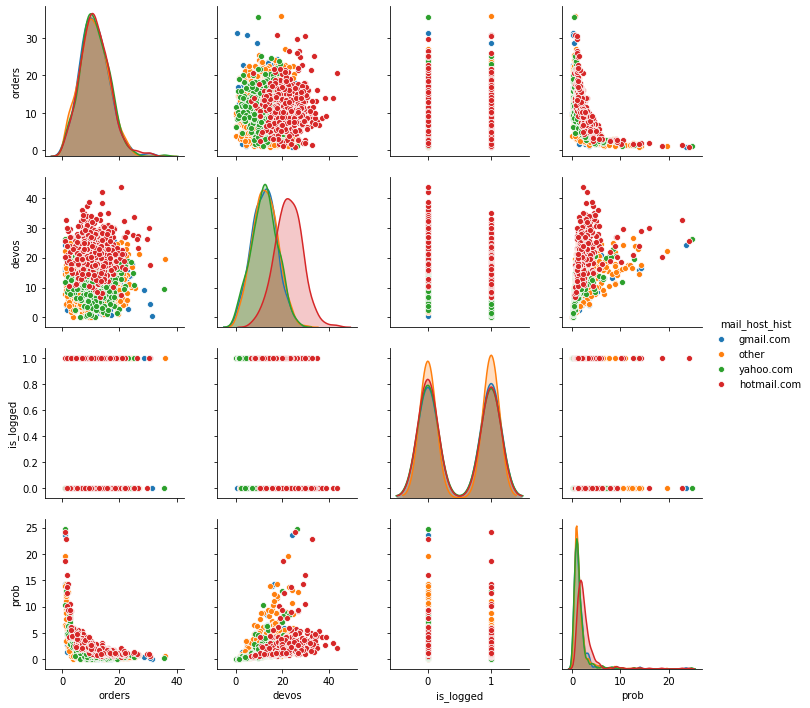

In [54]:
seaborn.pairplot(df, hue='mail_host_hist')

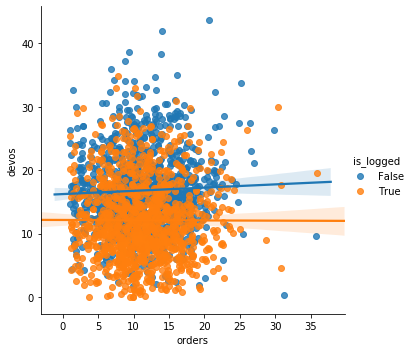

In [55]:
seaborn.lmplot('orders', 'devos', hue='is_logged', data=df)

In [56]:
mailcounts = pandas.value_counts(df['email'].values)
df['email_count']=list(map(lambda x: mailcounts[x], df['email']))

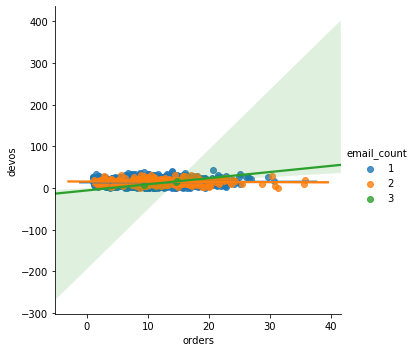

In [57]:
seaborn.lmplot('orders', 'devos', hue='email_count', data=df)

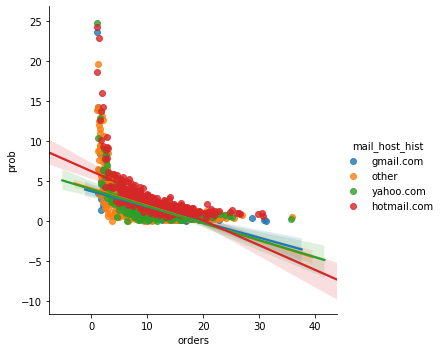

In [58]:
seaborn.lmplot('orders', 'prob', hue='mail_host_hist', data=df)

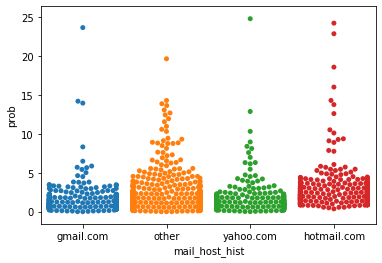

In [59]:
seaborn.swarmplot('mail_host_hist', 'prob', data=df)

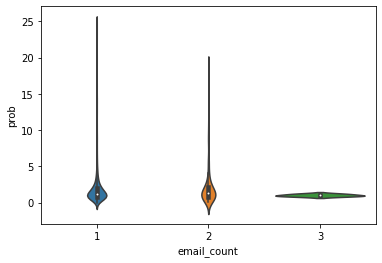

In [60]:
seaborn.violinplot('email_count', 'prob', data=df)

In [61]:
df.describe()

,orders,devos,prob,email_count
count,2110.000000,2110.000000,2110.000000,2110.000000
mean,11.334035,14.453053,1.778462,1.106161
std,5.005087,6.715848,2.051913,0.312699
min,1.025342,0.013282,0.003561,1.000000
25%,7.931658,9.657847,0.797413,1.000000
50%,10.999543,13.869528,1.237985,1.000000
75%,14.614244,18.584520,2.021845,1.000000
max,35.796877,43.624868,24.803227,3.000000


In [62]:
df.keys()

Index(['name', 'email', 'phone', 'orders', 'devos', 'is_logged', 'country',
       'currency', 'prob', 'mail_host', 'mail_host_hist', 'email_count'],
      dtype='object')

In [63]:
df.head()

,name,email,phone,orders,devos,is_logged,country,currency,prob,mail_host,mail_host_hist,email_count
0,Rafael Ávila Valera,nfiol@gmail.com,+34 378 854 037,13.399819,15.863821,False,China,CNY,1.183883,gmail.com,gmail.com,1
1,Cristian Requena-Cal,fbenavides@heras.com,+34 252 852 542,6.315560,12.541837,True,Russia,RUB,1.985863,heras.com,other,1
2,Begoña Garcés Lucas,soledadperez@capdevila-becerra.com,+34787 521 223,18.885509,20.804534,False,Russia,RUB,1.101614,capdevila-becerra.com,other,1
3,Luz de Cid,celia29@fortuny.com,+34906 399 408,6.540777,8.027166,True,Germany,EUR,1.227250,fortuny.com,other,1
4,Encarnacion Francisca Navarrete Valverde,ricardo71@yahoo.com,+34 076014719,17.629685,8.773067,True,Russia,RUB,0.497630,yahoo.com,yahoo.com,1


In [25]:
Y=df['prob']

Quedémonos con tres features muy tontas, a ver cómo de malos salen los modelos...

In [27]:
FEATURES = ['is_logged', 'mail_host_hist', 'email_count']
X=df[FEATURES]

Esto es el encoder para tratar strings como categorías:

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X)
enc.categories_
XX=enc.transform(X)

Separamos el 90% de datos de trainng y el restante 10% como evaluación

In [ ]:
Xtrain=XX[:int(len(XX)*0.90)]
Ytrain=Y[:int(len(Y)*0.90)]
Xtest=XX[int(len(XX)*0.90):]
Ytest=Y[int(len(Y)*0.90):]

Vamos a entrenar unos cuantos modelos.

In [ ]:
models ={} 
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.linear_model
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
models['GradientBoosting'] = GradientBoostingRegressor()
models['kneighs'] = KNeighborsRegressor()
models['Huber'] = sklearn.linear_model.HuberRegressor()
models['linear'] = sklearn.linear_model.LinearRegression()
models['svr_poly'] = SVR(kernel='poly', gamma='scale')
models['random forests'] = RandomForestRegressor(n_estimators=100)
models['decission trees'] = tree.DecisionTreeRegressor()
models['Ada Boost - Tree']  = AdaBoostRegressor(tree.DecisionTreeRegressor())

In [ ]:
preds={}
for model in models.keys():
    print('Training', model)
    models[model].fit(X=Xtrain,y=Ytrain)
    preds[model] = sorted(abs(models[model].predict(Xtest)-Ytest), reverse=True)
    print('score:', models[model].score(Xtest, Ytest))
    try:
        feature_importance = models[model].feature_importances_
        f=plt.figure(figsize=(10, 3))
        seaborn.barplot(feature_importance, FEATURES)
        plt.show()
    except:
        print('unable to see feature importances for %s' % model)

In [31]:
predsdf=pandas.DataFrame.from_dict(preds)

Vamos a intentar visualizar el histograma de errores cometidos.

In [33]:
predsdf.plot_bokeh.hist(bins=100)

Figure(id='1476', ...)

In [64]:
import numpy as np
from os.path import dirname, join

In [67]:
def modify_doc(doc):
    df["color"] = np.where(df["is_logged"] > 0, "#33cc33", "grey")
    df["alpha"] = np.where(df["is_logged"] > 0, 0.9, 0.25)

    axis_map = {
        "Orders": "orders",
        "Returns": "devos",
        "Prop": "prob",
        "Email count": "email_count",
    }
    countries = ['China', 'Germany', 'Russia']

    orders = Slider(title="Minimum number of orders", value=0, start=10, end=300, step=1)
    devos = Slider(title="Minimum number of devos", value=0, start=0, end=2014, step=1)
    country_select = Select(title="Country", options=countries, value="Germany")
    x_axis = Select(title="X Axis", options=sorted(axis_map.keys()), value="Orders")
    y_axis = Select(title="Y Axis", options=sorted(axis_map.keys()), value="Returns")

    desc = Div(text=open("description.html").read(), sizing_mode="stretch_width")

    # Create Column Data Source that will be used by the plot
    source = ColumnDataSource(data=dict(x=[], y=[], color=[], alpha=[], name=[], email=[], orders=[], devos=[]))
    
    # Configuring Plot Tools
    tools_op=["pan", "lasso_select", "box_select", "box_zoom", "wheel_zoom", "reset", "save"]
    
    # Tooltips
    TOOLTIPS = [
        ("Name", "@name"),
        ("Email", "@email"),
        ("Nº orders", "@orders"),
        ("Nº devos", "@devos")
    ]

    p = figure(plot_height=600, plot_width=700, title="User data", tools=tools_op, tooltips=TOOLTIPS, sizing_mode="scale_both")
    p.circle(x="x", y="y", source=source, size=7, color="color", line_color=None, fill_alpha="alpha")
    
    # Functions
    def filter_data():
        filtered = df[
            (df.orders >= orders.value) &
            (df.devos >= devos.value) &
            (df['country'] == country_select.value)
        ]
        return filtered

    def update_graph():
        df = filter_data()
        x_name = axis_map[x_axis.value]
        y_name = axis_map[y_axis.value]

        p.xaxis.axis_label = x_axis.value
        p.yaxis.axis_label = y_axis.value
        source.data = dict(
            x=df[x_name],
            y=df[y_name],
            color=df["color"],
            alpha=df["alpha"],
            name=df["name"],
            email=df["email"],
            orders=df["orders"],
            devos=df["devos"]
        )

    # Controls
    controls = [orders, devos, country_select,  x_axis, y_axis]
    for control in controls:
        control.on_change('value', lambda attr, old, new: update_graph())
    button = Button(label='Export to csv')
    controls.append(button)

    inputs = column(*controls, width=320, height=1000)
    inputs.sizing_mode = "fixed"
    l = layout([
        desc,
        [inputs, p],
    ], sizing_mode="scale_both")

    update_graph()  # initial load of the data

    doc.add_root(l)

show(modify_doc, notebook_url="localhost:8889")

In [68]:
# Create new dataframe for d3graph lib
graph_data = [];
for index, row in df.iterrows():
    graph_data.append({
        'source': row["name"],
        'target': row["email"],
        'weight': 1
    })
graph_df = pandas.DataFrame.from_dict(graph_data)
graph_df

,source,target,weight
0,Rafael Ávila Valera,nfiol@gmail.com,1
1,Cristian Requena-Cal,fbenavides@heras.com,1
2,Begoña Garcés Lucas,soledadperez@capdevila-becerra.com,1
3,Luz de Cid,celia29@fortuny.com,1
4,Encarnacion Francisca Navarrete Valverde,ricardo71@yahoo.com,1
...,...,...,...
2105,Francisca Arcos Garzón,beatrizramos@sanmiguel.org,1
2106,Alfredo Rueda Pedrosa,gironadiego@yahoo.com,1
2107,Jose Carlos Rocamora Artigas,andrea52@alcantara.com,1
2108,Sandra Mar Parejo Carrera,davidribes@sosa.com,1


In [69]:
# d3fdgraph python lib
import d3fdgraph

In [71]:
p = d3fdgraph.plot_force_directed_graph(graph_df[:40], node_radius=4, link_distance=1, collision_scale=3)

force-directed graph